## 대표적인 **비지도학습**으로 많이 쓰이는 **신경망 오토인코더(Autoencoder**)가 있다.


오토 인코더는 **입력값과 출력값을 같게**하는 신경망이다.



* 훈련 데이터와 매우 비슷한 새로운 데이터를 생성한다.

* 만약 얼굴 사진을 이용하여 오토 인코더를 훈련시키면 이 모델은 새로운 얼굴을 생성할 수 있다.

* 출력층의 뉴런수와 입력수가 동일하다는 것을 제외하면 일반적으로 오토 인코더는 다층 퍼셉트론과 동일한
구조를 갖는다.

**인코더와 디코더**로 구성

* 1)입력을 내부 표현을 변경하는 인코더(encoder)
* 2)내부 표현을 출력으로 바꾸는 디코더(decoder)

**가운데 계층의 노드 수가 입력값보다 적은 것**이 특징이다.

결과적으로 **입력 데이터를 압축하는 효과**를 얻는다. 이 과정이 **노이즈 제거에 많이 효과적**이다. 

* 변이형 오토인코더(Variational Autoencoder), 잡음제거 오토 인코더(Denoising
Autoencoder) 등의 방식이 존재

In [0]:
import os, warnings
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("./mnist/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습율 0.01
training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
batch_size = 100 # 배치 사이즈 100
n_hidden = 256 # 은닉층의 노드 개수 256
n_input = 28 * 28 # 784개 (입력층)

## **인코더(encoder) 만들기**
* STEP 01. 맨처음은 n_hidden개의 뉴런을 가지는 은닉층을 만들기
* STEP 02. 가중치(W)와 편향 변수(B)를 원하는 뉴런의 개수만큼 설정.
* STEP 03. 활성화 함수 sigmoid 함수를 적용.
* 기억해두기, **n_input(입력층 노드) 값보다 n_hidden(은닉층 노드) 값이 더 작다.**

   * 항상 그런것이 아니라 은닉층이 더 큰 오토인코더 모델도 있음.

In [0]:
#STEP 01. 맨처음은 n_hidden개의 뉴런을 가지는 은닉층을 만들기
X = tf.placeholder(tf.float32, [None, n_input])

#STEP 02. 가중치(W)와 편향 변수(B)를 원하는 뉴런의 개수만큼 설정.
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden])) 

#STEP 03. 활성화 함수 sigmoid 함수를 적용.
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode),b_encode))

## 디코더(decoder) 만들기
* Tip01. 여기서 입력값은 은닉층의 노드수가 된다.
* Tip02. 출력값을 입력층의 크기로 만듬.

* 은닉층 데이터를 디코더를 통해 출력층으로 내보낸다.


## 만들어진 출력값을 입력값과 비슷해 지도록 만드는 가중치를 찾는다.

In [0]:
#Tip02. 출력값을 입력층의 크기로 만듬.
W_decode = tf.Variable(tf.random_normal([ n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input])) 

#03. 활성화 함수 sigmoid 함수를 적용.
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode),b_decode))

## 손실함수(cost) 및 최적화(optimizer)함수
* 입력값 X를 평가하기 위한 실측값 사용.
* 디코더가 내보낸 결과값과의 차이(X-decoder)를 손실값으로 설정.

In [7]:
#손실함수 : 디코더가 내보낸 결과값과의 차이(X-decoder)를 손실값으로 설정.
#전에 우리가 사용한 건 출력값
#지금의 손실함수는 입력값(X-decoder) 사용
cost=tf.reduce_mean(tf.pow(X-decoder,2))
#최적함 함수 사용 : RMSPropOptimizer 함수
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
total_batch = int(mnist.train.num_examples/batch_size)

In [10]:
for epoch in range(training_epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost],feed_dict={X:batch_xs})  
    #지금의 손실함수는 입력값 사용했으므로 Y값 필요없음
    total_cost += cost_val
  print('Epoch:', '%04d' % (epoch + 1),
        'Avg. cost=', '{:.4f}'.format(total_cost / total_batch))
  print('최적화 완료! {}'.format(epoch+1))

Epoch: 0001 Avg. cost= 0.1966
최적화 완료! 0
Epoch: 0002 Avg. cost= 0.0568
최적화 완료! 1
Epoch: 0003 Avg. cost= 0.0471
최적화 완료! 2
Epoch: 0004 Avg. cost= 0.0427
최적화 완료! 3
Epoch: 0005 Avg. cost= 0.0407
최적화 완료! 4
Epoch: 0006 Avg. cost= 0.0384
최적화 완료! 5
Epoch: 0007 Avg. cost= 0.0362
최적화 완료! 6
Epoch: 0008 Avg. cost= 0.0353
최적화 완료! 7
Epoch: 0009 Avg. cost= 0.0346
최적화 완료! 8
Epoch: 0010 Avg. cost= 0.0333
최적화 완료! 9
Epoch: 0011 Avg. cost= 0.0319
최적화 완료! 10
Epoch: 0012 Avg. cost= 0.0312
최적화 완료! 11
Epoch: 0013 Avg. cost= 0.0309
최적화 완료! 12
Epoch: 0014 Avg. cost= 0.0306
최적화 완료! 13
Epoch: 0015 Avg. cost= 0.0299
최적화 완료! 14
Epoch: 0016 Avg. cost= 0.0294
최적화 완료! 15
Epoch: 0017 Avg. cost= 0.0285
최적화 완료! 16
Epoch: 0018 Avg. cost= 0.0275
최적화 완료! 17
Epoch: 0019 Avg. cost= 0.0270
최적화 완료! 18
Epoch: 0020 Avg. cost= 0.0267
최적화 완료! 19


In [13]:
## 디코더로 생성해 낸 결과를 직관적 방법으로 확인해보자!

sample_size=10
samples=sess.run(decoder,feed_dict={X:mnist.train.images[:sample_size]})  
#[optimizer,cost]대신 decoder
samples

array([[0.0000000e+00, 2.0861626e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.9406967e-08],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.5399876e-06,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.9802322e-08, ..., 0.0000000e+00,
        1.6391277e-06, 2.9802322e-08],
       ...,
       [1.1026859e-06, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.9604645e-08, 1.1920929e-07],
       [1.4901161e-07, 3.5762787e-07, 0.0000000e+00, ..., 5.9604645e-08,
        0.0000000e+00, 9.3877316e-06]], dtype=float32)

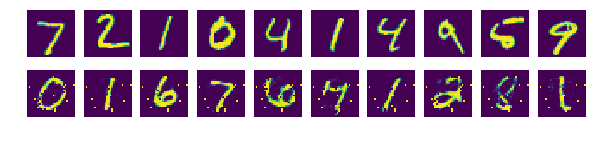

In [14]:
fig, ax=plt.subplots(2,sample_size,figsize=(sample_size,2))

for i in range(sample_size):
  ax[0][i].set_axis_off() #위치지정
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28))) #원본
  ax[1][i].imshow(np.reshape(samples[i],(28,28))) #신경망 (오토인코더)